# Examen Classification 20 Décembre 2023

Notebook à compléter et à déposer sur Tomuss

A ajouter lien vers prompt ChatGPT ou Bard

L'ensemble des ressources (fichiers) nécessaires sont disponible sur le google drive :
https://drive.google.com/drive/folders/1-2S5dzlxJ4ifCGfyutujV0tdofx7L20r?usp=sharing



# Partie I - Geo-localisation

Une carte RSSI ("Received Signal Strength Indication"), qui se traduit en français par "Indication de la force du signal reçu", est un outil de mesure utilisé pour évaluer la puissance du signal radio reçu par un dispositif sans fil, comme un routeur Wi-Fi ou un point d'accès. La carte RSSI mesure la force du signal en décibels et peut être utilisée pour déterminer la qualité de la connexion sans fil. Les cartes RSSI sont souvent utilisées dans les réseaux sans fil pour diagnostiquer les problèmes de connexion et optimiser les performances du réseau.

En plus d'être utilisées pour du diagnostique, les cartes RSSI peuvent également être utilisées pour localiser du matériel. Cela est possible car la force du signal reçu par un dispositif sans fil varie en fonction de la distance entre le dispositif et le point d'accès. En mesurant la force du signal reçu par un dispositif à partir de plusieurs points d'accès connus, on peut déterminer la position approximative du dispositif.

Dans cette partie on se donne 4 cartes RSSI (voir fichiers RSSI_X.csv) correspondant à 4 passerelles (bornes wifi) d'un local industriel. Chaque carte RSSI est un tableau de mesures prises tout les metres (en x et y) suivant une grille cartésienne. On veut construire une fonction qui à partir des 4 forces de signal des bornes reçues donne la position $(f_1,f_2,f_3,f_4) ⟶(x,y)$.


## Question 1

Analyser et afficher les 4 cartes RSSI (on pourrat faire qu'un seul graphique des 4 cartes).

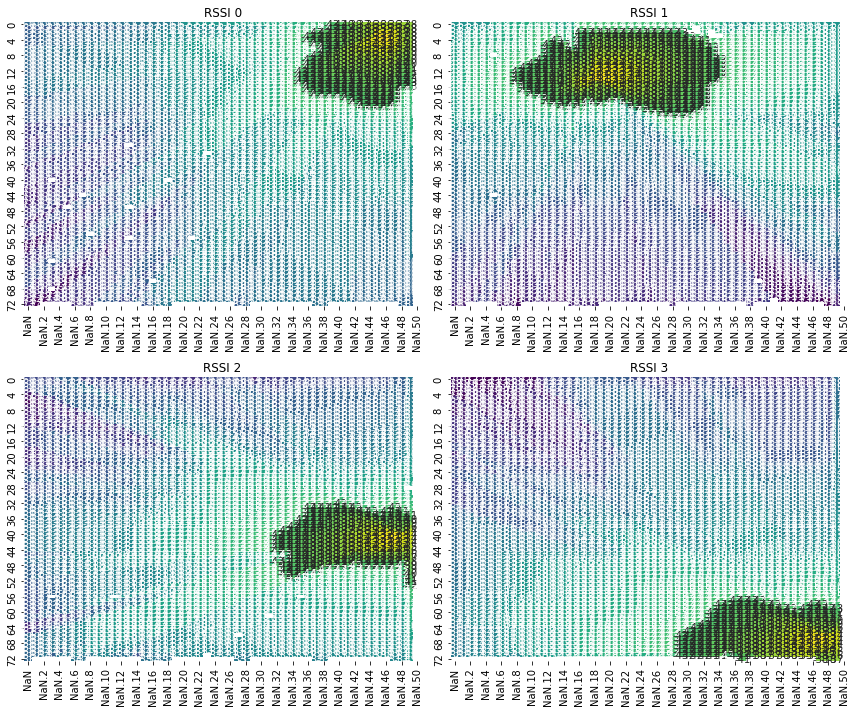

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rssi_1 = pd.read_csv("RSSI_1.csv")
rssi_2 = pd.read_csv("RSSI_2.csv")
rssi_3 = pd.read_csv("RSSI_3.csv")
rssi_0 = pd.read_csv("RSSI_0.csv")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(rssi_0, annot=True, cmap='viridis', ax=axes[0, 0], cbar=False)
axes[0, 0].set_title('RSSI 0')

sns.heatmap(rssi_1, annot=True, cmap='viridis', ax=axes[0, 1], cbar=False)
axes[0, 1].set_title('RSSI 1')

sns.heatmap(rssi_2, annot=True, cmap='viridis', ax=axes[1, 0], cbar=False)
axes[1, 0].set_title('RSSI 2')

sns.heatmap(rssi_3, annot=True, cmap='viridis', ax=axes[1, 1], cbar=False)
axes[1, 1].set_title('RSSI 3')

plt.tight_layout()
plt.show()


## Question 2

Proposer une méthode pour compléter les données manquantes

In [7]:
# Compléter les données manquantes par la moyenne pour chaque carte RSSI
rssi_0 = rssi_0.fillna(rssi_0.mean())
rssi_1 = rssi_1.fillna(rssi_1.mean())
rssi_2 = rssi_2.fillna(rssi_2.mean())
rssi_3 = rssi_3.fillna(rssi_3.mean())
#print(rssi_0)
#print(rssi_1)
#print(rssi_2)
#print(rssi_3)


## Question 3

Construire l'ensemble d'apprentissage du réseau qui met en correspondance les 4 forces du signal et la position $(f_1,f_2,f_3,f_4) ⟶(x,y)$


In [15]:
rssi_1['x'] = rssi_1.iloc[:, 0] // 100 
rssi_1['y'] = rssi_1.iloc[:, 1] % 100  

rssi_2['x'] = rssi_2.iloc[:, 0] // 100  
rssi_2['y'] = rssi_2.iloc[:, 1] % 100  

rssi_3['x'] = rssi_3.iloc[:, 0] // 100  
rssi_3['y'] = rssi_3.iloc[:, 1] % 100   

dataset = pd.concat([rssi_0, rssi_1, rssi_2, rssi_3], ignore_index=True)


print("Colonnes de l'ensemble d'apprentissage :")
print(dataset.columns)


print("\nEnsemble d'apprentissage :")
print(dataset.head())


Colonnes de l'ensemble d'apprentissage :
Index(['NaN', 'NaN.1', 'NaN.2', 'NaN.3', 'NaN.4', 'NaN.5', 'NaN.6', 'NaN.7',
       'NaN.8', 'NaN.9', 'NaN.10', 'NaN.11', 'NaN.12', 'NaN.13', 'NaN.14',
       'NaN.15', 'NaN.16', 'NaN.17', 'NaN.18', 'NaN.19', 'NaN.20', 'NaN.21',
       'NaN.22', 'NaN.23', 'NaN.24', 'NaN.25', 'NaN.26', 'NaN.27', 'NaN.28',
       'NaN.29', 'NaN.30', 'NaN.31', 'NaN.32', 'NaN.33', 'NaN.34', 'NaN.35',
       'NaN.36', 'NaN.37', 'NaN.38', 'NaN.39', 'NaN.40', 'NaN.41', 'NaN.42',
       'NaN.43', 'NaN.44', 'NaN.45', 'NaN.46', 'NaN.47', 'NaN.48', 'NaN.49',
       'NaN.50', 'x', 'y'],
      dtype='object')

Ensemble d'apprentissage :
         NaN      NaN.1      NaN.2      NaN.3      NaN.4      NaN.5  \
0 -59.725737 -59.565726 -59.402224 -59.235079 -59.090795 -58.915865   
1 -62.864795 -62.707834 -62.499805 -62.334798 -62.166085 -61.993498   
2 -61.294216 -61.135160 -59.394452 -59.226864 -59.055489 -58.880158   
3 -61.393138 -61.234277 -59.492554 -59.325155 -59.153981 -58

## Question 4

Proposer en argumantant vos choix un réseau de neurone dense avec un fonction Loss appropriée.

In [19]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_dim=51, activation='relu'))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                3328      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 3,458
Trainable params: 3,458
Non-trainable params: 0
_________________________________________________________________


## Question 5

En utilisant la métrique "R2 score" et en séparant les données en un ensemble d'apprentissage et un ensemble de test entrainer votre réseau.

Tracer l'historique de l'évolution de la fonction Loss et de la métrique R2

Epoch 1/50
6/6 [==============================] - 2s 70ms/step - loss: 3.3104 - mse: 3.3104 - mae: 1.4989 - mape: 198107776.0000 - r2_metric: -4.7032 - val_loss: 2.5191 - val_mse: 2.5191 - val_mae: 1.3653 - val_mape: 173297248.0000 - val_r2_metric: -3.6433
Epoch 2/50
6/6 [==============================] - 0s 14ms/step - loss: 1.9144 - mse: 1.9144 - mae: 1.1873 - mape: 206841376.0000 - r2_metric: -2.1317 - val_loss: 1.9031 - val_mse: 1.9031 - val_mae: 1.1780 - val_mape: 191815280.0000 - val_r2_metric: -2.6141
Epoch 3/50
6/6 [==============================] - 0s 23ms/step - loss: 1.7086 - mse: 1.7086 - mae: 1.1116 - mape: 223486880.0000 - r2_metric: -1.7422 - val_loss: 1.9829 - val_mse: 1.9829 - val_mae: 1.2274 - val_mape: 205291104.0000 - val_r2_metric: -2.7293
Epoch 4/50
6/6 [==============================] - 0s 24ms/step - loss: 1.6562 - mse: 1.6562 - mae: 1.1000 - mape: 225346896.0000 - r2_metric: -1.7714 - val_loss: 1.9590 - val_mse: 1.9590 - val_mae: 1.2220 - val_mape: 201069936.00

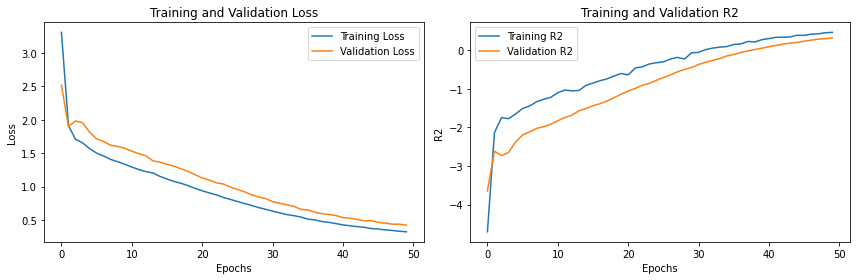

In [24]:
from keras import backend as K

# Définir la fonction R2 comme métrique
def r2_metric(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(2, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae', 'mape', r2_metric])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

metrics = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', metrics[0])
print('Test R2 score:', metrics[4])

loss = history.history['loss']
val_loss = history.history['val_loss']
r2 = history.history['r2_metric']
val_r2 = history.history['val_r2_metric']
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(r2, label='Training R2')
plt.plot(val_r2, label='Validation R2')
plt.title('Training and Validation R2')
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.legend()
plt.tight_layout()
plt.show()


## Question 6

Tracer l'histogramme des distances obtenues entre la position prédites et celle voulue

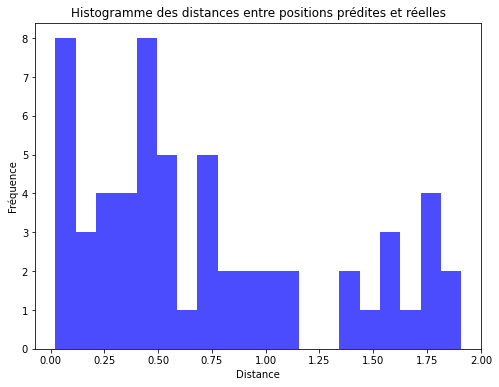

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

# Redimensionner la matrice y_test
y_test = np.expand_dims(y_test, axis=1)

# Calculer les distances entre les positions prédites et réelles
distances = np.sqrt(np.sum(np.square(y_pred - y_test), axis=1))

# Tracer l'histogramme
plt.figure(figsize=(8, 6))
plt.hist(distances, bins=20, color='blue', alpha=0.7)
plt.title('Histogramme des distances entre positions prédites et réelles')
plt.xlabel('Distance')
plt.ylabel('Fréquence')
plt.show()


## Question 7

Conclure et donner la précision de votre systeme de localisation.

## Question 8

Proposer une amélioration de votre modèle

## Question 9

Partager votre fil de discution ChatGPT ou autre ici.

In [ ]:
https://chat.openai.com/share/8e3c3c79-4441-4255-b41e-79584f94d7a1